### 다중 회귀

In [6]:
# Pandas로 데이터 준비. csv 파일로 받아서 pandas dataframe -> numpy 배열로 변환

import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


### 다항 특성 만들기
- 여러개의 특성을 사용한 선형 회귀를 다중 회귀(Multiple Regression)이라고 부릅니다.
- 농어 길이 x 농어 높이: 이렇게 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업을 특성공학(Feature Engineering)이라고 부릅니다.

In [7]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [8]:
# Scikit-learn 훈련세트는 2차원 배열이여야 함으로, Numpy의 reshape method를 사용해서 2차원으로 봐꿔줌
# perch_full & perch_weight를 훈련 & 테스트 세트로 나눈다.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### scikit-learn의 변환기
- scikit-learn은 특성을 만들거나, 전처리 하기 위하여 다양한 클래스 제공: 이 class를 변환기(transformer)라고 부른다.
- 추가로 LinearRegression 에서는 추정기, Transformer에서는 변환기 라고 부른다.
- PolynomialFeatures이 하는건? 별거 없어요. 하는게 특성 몇개인지, 2 x 3을 해서 어떤 조합으로 만드는지 파악하는 정도?
- y = a * x + b * 1 [a,b] * [x,1]

In [9]:
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures(변환기) - degree라는 매개변수: 기본값이 2(제곱항을 만들어주는 표시)

# degree = 2 (3이면 3제곱(제곱항이 3)으로 한다.)
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2,3]])) # 2,3 이라는 가상의 sample data
# 2,3:원래 있던 특성 그대로. 2-4, 3-9, 2*3-6. 1은 절편을 위한 특성44

[[1. 2. 3. 4. 6. 9.]]


무게 = a x 길이 + b x 높이 + c x 두께 + d x 1

In [10]:
# include_bias=False로 지정하여 다시 특성을 변환
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [11]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input) # fit(훈련)
train_poly = poly.transform(train_input) #train_poly(numpy 배열)

print(train_poly.shape)

(42, 9)


In [12]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

- ‘x0’은 첫번째 특성을 의미하고
- ‘x0"'2’는 첫번째 특성의 제곱,
- ‘x0xl’은 첫번째 특성과 두번째 특성의 곱을 나타내는 식입니다.

In [13]:
# training_set에 사용한걸 test_set에 사용한다.
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련하기

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

0.9903183436982125


In [15]:
print(lr.score(test_poly, test_target)) # 과소적합 문제 해결

0.9714559911594159


### 더 많은 특성 만들기

In [16]:
poly = PolynomialFeatures(degree=5, include_bias=False) # 5제곱까지 특성을 만들어서 출력

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


In [17]:
lr.fit(train_poly, train_target)

LinearRegression()

In [18]:
print(lr.score(train_poly, train_target))

0.999999999999769


In [19]:
# 음수가 뜨는 이유: training_set에 너무 과대 적합 되어서.
print(lr.score(test_poly, test_target))

-144.40490595353674


### 규제 전에 표준화
- 머신러닝 모넬이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을
- 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것.
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는일.

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 객체 초기화 
ss.fit(train_poly) # 모델 훈련

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 선형 회귀 모델의 규제를 추가한 모델 - 릿지(Ridge) & 라쏘(Lasso)

### 릿지 회귀
- L2 규제, 다른 class에 L2규제가 적용됬을땐? 선형회귀에서는 릿지 회귀 라고 한다.

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge() #alpha=1(1이면 강도 쎔, 0이면 강도 약함), 사전에 우리가 지정해야 되는 값임 - 이러한 값을 hyperparameter라고 부른다.
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [23]:
print(ridge.score(test_scaled, test_target))

0.9790693977615388


### 적절한 규제 강도 찾기

In [24]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #보통은 7의 배수로 hyperparameter 범위 지정 및 훈련
for alpha in alpha_list:
    # alpha_list 안에 있는 값들로 하나씩 for문을 돌려가면서, 모델을 훈련합니다.
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다.
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

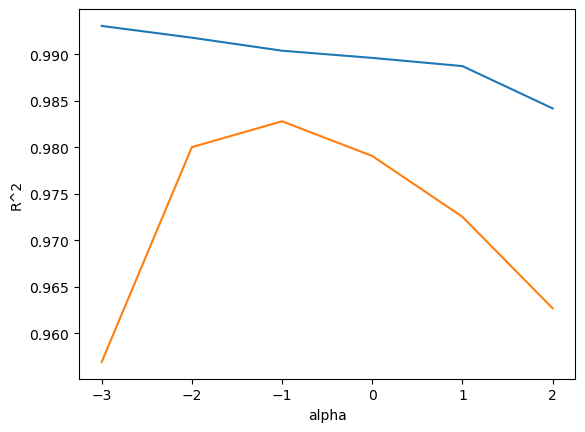

In [25]:
plt.plot(np.log10(alpha_list), train_score) #log10 - log scale로 봐꿈
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# alpha 값이 쎄지면 규제가 쎄져서, training_set score가 낮아짐, alpha값이 약해지면 반대
# 왼쪽은 과대적합, 오른쪽은 과소적합

In [26]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

0.9903815817570366


In [27]:
print(ridge.score(test_scaled, test_target))

0.9827976465386955


### 라쏘 회귀
- 가중치의 절대값에 제곱을 준다.

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [29]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #보통은 7의 배수로 hyperparameter 범위 지정 및 훈련
for alpha in alpha_list:
    # alpha_list 안에 있는 값들로 하나씩 for문을 돌려가면서, 모델을 훈련합니다.
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다.
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


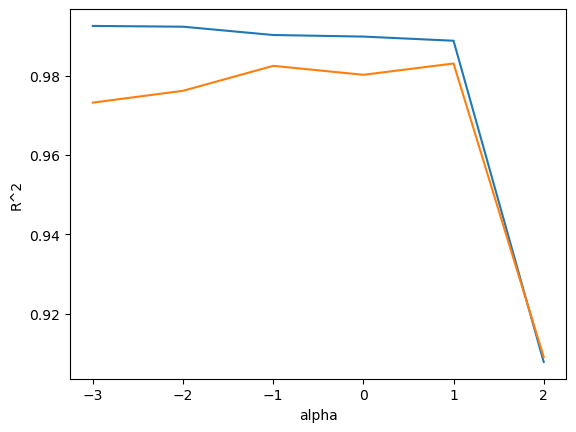

In [30]:
plt.plot(np.log10(alpha_list), train_score) #log10 - log scale로 봐꿈
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [31]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [54]:
print(np.sum(lasso.coef_ == 0))

40
